# **Installing xmltodict**

In [ ]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Libraries**

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
import seaborn as sns
from collections import Counter
from PIL import Image
import sys
import torch.optim as optim
import xmltodict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# **Extracting File names**

In [ ]:
img_names=[]
xml_names=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Embedded Project/mask_and_without_mask'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]!="xml":
            img_names.append(filename)
        else:
            xml_names.append(filename)

In [ ]:
print(img_names[1])
print(xml_names[1])

maksssksksss10.png
maksssksksss0.xml


# **Counting occurrences of each object name**

In [ ]:
path_annotations="/content/drive/MyDrive/Embedded Project/mask_and_without_mask/annotations/"
listing=[]
for i in img_names[:]:
    with open(path_annotations+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])


Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['with_mask', 'without_mask', 'mask_weared_incorrect']) 
 dict_values([3232, 717, 123])


# **Plotting bounding box**

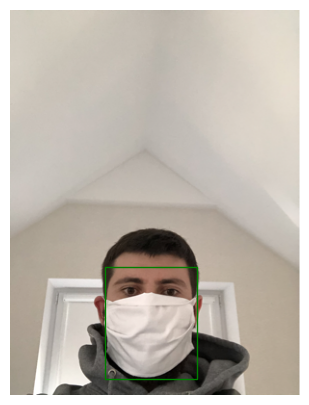

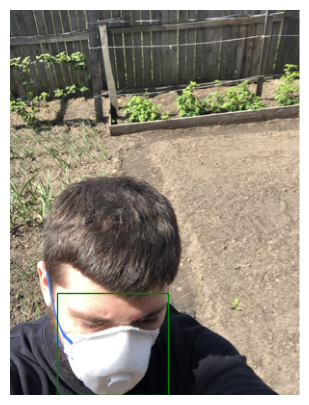

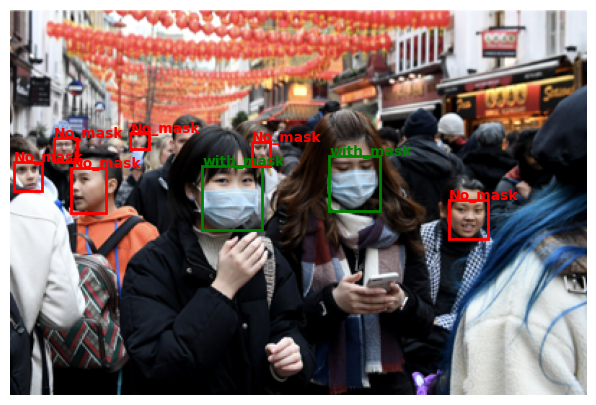

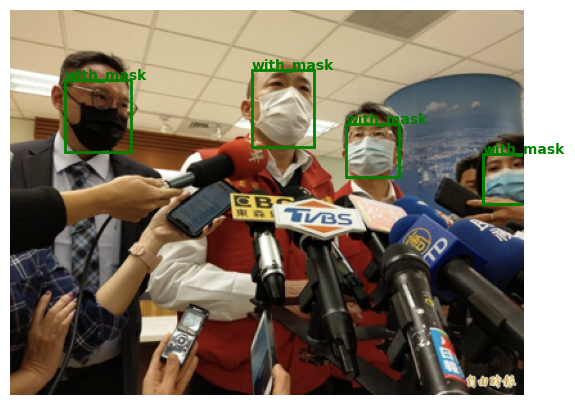

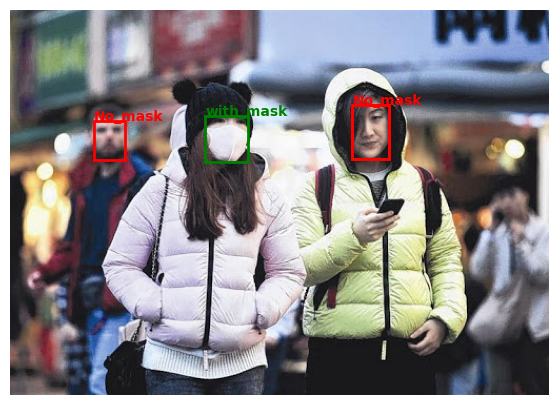

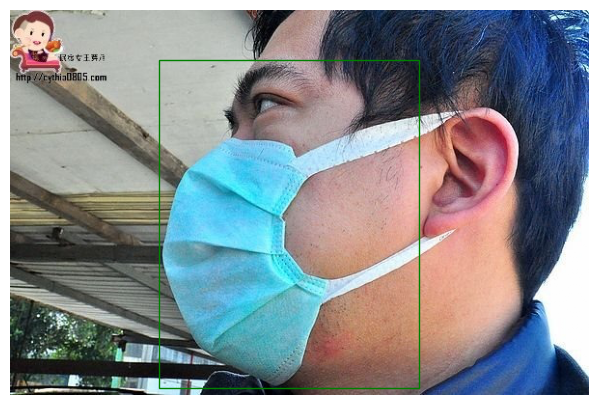

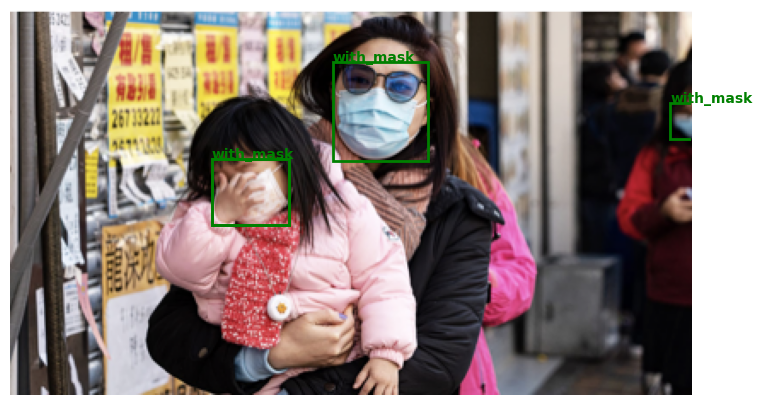

In [ ]:
path_image="/content/drive/MyDrive/Embedded Project/mask_and_without_mask/images/"
def face_cas(img):
    with open(path_annotations+img[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    image=plt.imread(os.path.join(path_image+img))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            ###with_mask
            if temp[i]["name"]=="with_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='g',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("with_mask", (rx, ry), color='green', weight='bold', fontsize=10, ha='left', va='baseline')
            ###without_mask
            if temp[i]["name"]=="without_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='r',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("No_mask", (rx, ry), color='red', weight='bold', fontsize=10, ha='left', va='baseline')
            ###mask_weared_incorrect
            if temp[i]["name"]=="mask_weared_incorrect":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='y',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("Not_weared_properly", (rx, ry), color='yellow', weight='bold', fontsize=10, ha='left', va='baseline')
    else:
        x,y,w,h=list(map(int,temp["bndbox"].values()))
        edgecolor={"with_mask":"g","without_mask":"r","mask_weared_incorrect":"y"}
        mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
    ax.imshow(image)
    ax.add_patch(mpatch)

fun_images = img_names.copy()
for i in range(1,8):
    face_cas(fun_images[i])

# **Classes**

In [ ]:
classes = {"with_mask":0,"without_mask":1,"mask_weared_incorrect":2}

# **Data Preprocessing**

In [ ]:
def dataset_creation(image_list):
    image_tensor=[]
    label_tensor=[]
    for i,j in enumerate(image_list):
        with open(path_annotations+j[:-4]+".xml") as fd:
            doc=xmltodict.parse(fd.read())
        if type(doc["annotation"]["object"])!=list:
            temp=doc["annotation"]["object"]
            x,y,w,h=list(map(int,temp["bndbox"].values()))
            label=classes[temp["name"]]
            image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"), y,x,h-y,w-x)
            image_tensor.append(transform(image))
            label_tensor.append(torch.tensor(label))
        else:
            temp=doc["annotation"]["object"]
            for k in range(len(temp)):
                x,y,w,h=list(map(int,temp[k]["bndbox"].values()))
                label=classes[temp[k]["name"]]
                image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"),y,x,h-y,w-x)
                image_tensor.append(transform(image))
                label_tensor.append(torch.tensor(label))

    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)


transform = transforms.Compose([
    transforms.Resize((226, 226)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = dataset_creation(img_names)

In [ ]:
dataset[0]

[tensor([[[ 1.4783,  1.4783,  1.4783,  ...,  1.1700,  1.1700,  1.1700],
          [ 1.4783,  1.4783,  1.4783,  ...,  1.1700,  1.1700,  1.1700],
          [ 1.4783,  1.4783,  1.4783,  ...,  1.1700,  1.1700,  1.1700],
          ...,
          [ 2.0263,  2.0263,  2.0263,  ..., -0.0801, -0.0801, -0.0801],
          [ 2.0263,  2.0263,  2.0263,  ..., -0.0801, -0.0801, -0.0801],
          [ 2.0263,  2.0263,  2.0263,  ..., -0.0801, -0.0801, -0.0801]],
 
         [[ 1.4132,  1.4132,  1.4132,  ...,  1.2381,  1.2381,  1.2381],
          [ 1.4132,  1.4132,  1.4132,  ...,  1.2381,  1.2381,  1.2381],
          [ 1.3957,  1.3957,  1.3957,  ...,  1.2381,  1.2381,  1.2381],
          ...,
          [ 1.9034,  1.9034,  1.9034,  ...,  0.1001,  0.1001,  0.1001],
          [ 1.9034,  1.9034,  1.9034,  ...,  0.1001,  0.1001,  0.1001],
          [ 1.9034,  1.9034,  1.9034,  ...,  0.1001,  0.1001,  0.1001]],
 
         [[ 1.8208,  1.8208,  1.8208,  ...,  1.5768,  1.5768,  1.5768],
          [ 1.8208,  1.8208,

# **Creating train and test loaders**

In [ ]:
train_size=int(len(dataset)*0.7)
test_size=len(dataset)-train_size
# data_dir = 'path/to/dataset'
batch_size = 16

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Length of dataset is', len(dataset), '\nLength of training set is :',train_size,'\nLength of test set is :', test_size)

Length of dataset is 4072 
Length of training set is : 2850 
Length of test set is : 1222


# **CNN Model**

In [ ]:
# Define the neural network model
class MaskDetector(nn.Module):
    def __init__(self):
        super(MaskDetector, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.relu4 = nn.ReLU(inplace=True)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 14 * 14, 512)
        self.relu5 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(512, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)

        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.pool4(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available()
                               else "cpu")

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
model = MaskDetector().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)


# **Training the model on train dataset**

In [ ]:

num_epochs = 50
best_accuracy = 0.0


for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()

    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)

    print(f'Epoch {epoch+1} Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy*100:.4f} %')

Epoch 1 Loss: 0.8248
Epoch 2 Loss: 0.2102
Epoch 3 Loss: 0.1584
Epoch 4 Loss: 0.1566
Epoch 5 Loss: 0.1585
Epoch 6 Loss: 0.1389
Epoch 7 Loss: 0.1364
Epoch 8 Loss: 0.1258
Epoch 9 Loss: 0.1234
Epoch 10 Loss: 0.0974
Epoch 11 Loss: 0.0886
Epoch 12 Loss: 0.1023
Epoch 13 Loss: 0.0893
Epoch 14 Loss: 0.0730
Epoch 15 Loss: 0.1220
Epoch 16 Loss: 0.0872
Epoch 17 Loss: 0.0567
Epoch 18 Loss: 0.0574
Epoch 19 Loss: 0.0513
Epoch 20 Loss: 0.0641
Epoch 21 Loss: 0.0525
Epoch 22 Loss: 0.0557
Epoch 23 Loss: 0.0752
Epoch 24 Loss: 0.0235
Epoch 25 Loss: 0.0584
Epoch 26 Loss: 0.0286
Epoch 27 Loss: 0.0357
Epoch 28 Loss: 0.0252
Epoch 29 Loss: 0.0225
Epoch 30 Loss: 0.0245
Epoch 31 Loss: 0.0229
Epoch 32 Loss: 0.0543
Epoch 33 Loss: 0.0348
Epoch 34 Loss: 0.0238
Epoch 35 Loss: 0.0457
Epoch 36 Loss: 0.0768
Epoch 37 Loss: 0.0276
Epoch 38 Loss: 0.0111
Epoch 39 Loss: 0.0152
Epoch 40 Loss: 0.0131
Epoch 41 Loss: 0.0243
Epoch 42 Loss: 0.0095
Epoch 43 Loss: 0.0011
Epoch 44 Loss: 0.0194
Epoch 45 Loss: 0.0291
Epoch 46 Loss: 0.15

# **Testing the model on test dataset**

In [ ]:
model.eval()
val_loss = 0.0
val_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        val_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        val_correct += (predicted == labels).sum().item()

val_loss = val_loss / len(test_loader.dataset)
val_accuracy = val_correct / len(test_loader.dataset)

print(f'Test Loss: {val_loss:.4f}  Test Accuracy: {val_accuracy*100:.4f} %')

if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    torch.save(model.state_dict(), 'best_model.pt')

print(f'\nBest Testing Accuracy: {best_accuracy*100:.4f} %')

Test Loss: 0.2301  Test Accuracy: 95.9902 %

Best Testing Accuracy: 95.9902 %
